# Ames Housing Data

### Introduction
This is a data set with 80 coulmns, containing 79 features and 1 target (Price)

Steps we should follow :
1. Let us understand the missing data's
1. Let us understand the correlation
1. choose the important features 
1. then clean them 
1. feature engineer some of them 


In [1]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
test = pd.read_csv("./Data/test.csv")
train = pd.read_csv("./Data/train.csv")

In [3]:
test['SalePrice'] = np.NaN

In [4]:
comb = pd.concat ([train,test],axis=0)

In [5]:
comb.set_index('Id',drop=True,inplace=True)
train.set_index('Id',drop=True,inplace=True)
test.set_index('Id',drop=True,inplace=True)

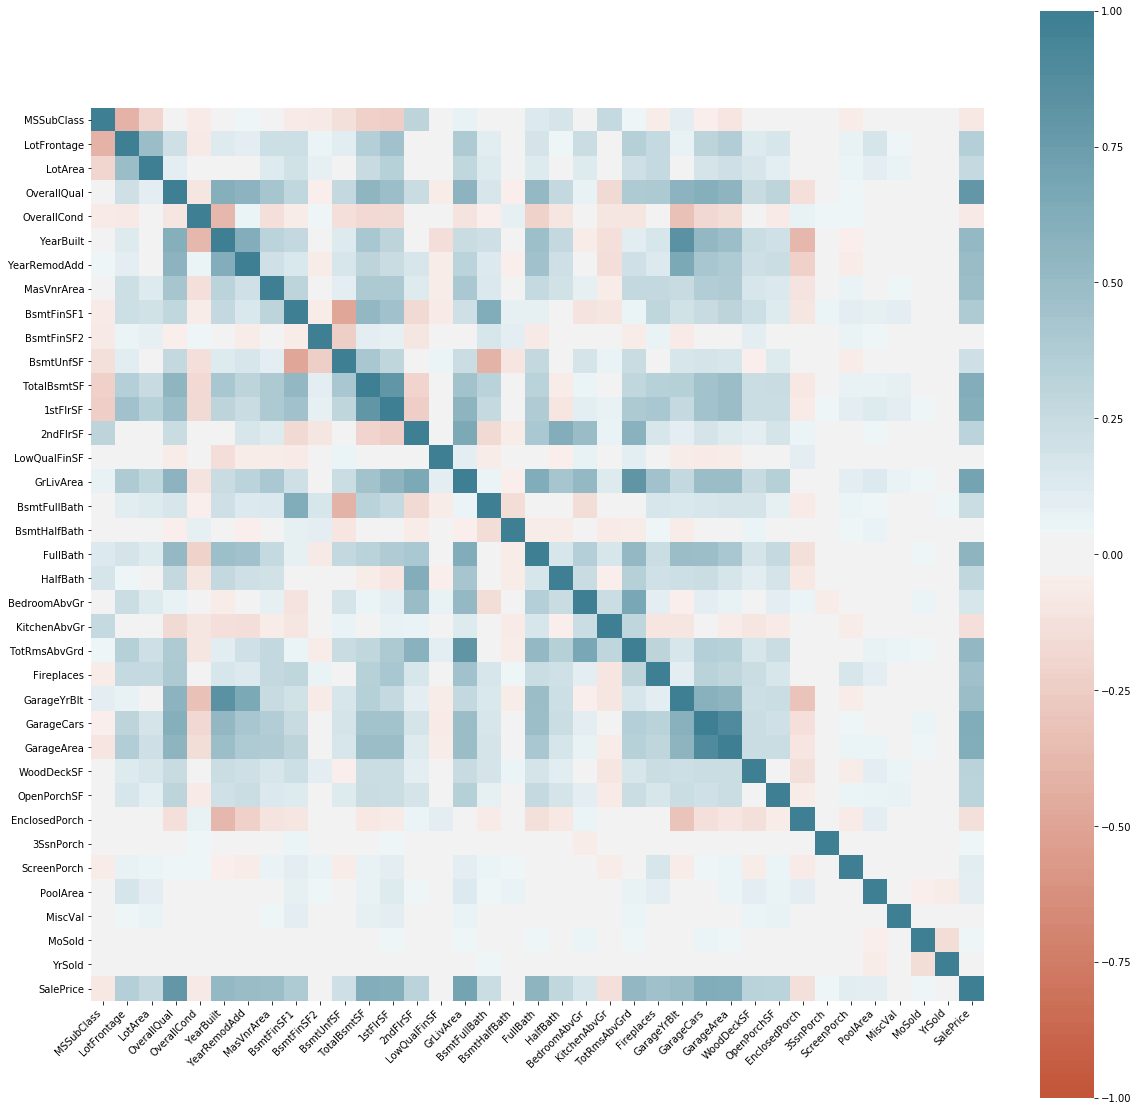

In [6]:
fig, ax = plt.subplots(figsize=(20,20))
ax = sns.heatmap(
    comb.corr(), 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
    )
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
plt.show()

In [7]:
corre=comb.corr()
corre = corre[(corre['SalePrice']>.5) | (corre['SalePrice']<-.5)]
selected_features = corre.index
corre = corre[selected_features]
corre

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice
OverallQual,1.000000,0.597554,0.571532,0.549294,0.479152,0.575126,0.528483,0.389761,0.600744,0.565122,0.790982
YearBuilt,0.597554,1.000000,0.612235,0.408515,0.310814,0.242666,0.471169,0.114280,0.538074,0.480735,0.522897
YearRemodAdd,0.571532,0.612235,1.000000,0.298107,0.242245,0.316972,0.457980,0.198250,0.426022,0.376765,0.507101
TotalBsmtSF,0.549294,0.408515,0.298107,1.000000,0.801670,0.445276,0.327762,0.282126,0.437997,0.486067,0.613581
1stFlrSF,0.479152,0.310814,0.242245,0.801670,1.000000,0.562538,0.373077,0.391782,0.440540,0.492011,0.605852
GrLivArea,0.575126,0.242666,0.316972,0.445276,0.562538,1.000000,0.630286,0.808354,0.489933,0.485469,0.708624
FullBath,0.528483,0.471169,0.457980,0.327762,0.373077,0.630286,1.000000,0.527337,0.479988,0.408487,0.560664
TotRmsAbvGrd,0.389761,0.114280,0.198250,0.282126,0.391782,0.808354,0.527337,1.000000,0.358053,0.328687,0.533723
GarageCars,0.600744,0.538074,0.426022,0.437997,0.440540,0.489933,0.479988,0.358053,1.000000,0.889700,0.640409
GarageArea,0.565122,0.480735,0.376765,0.486067,0.492011,0.485469,0.408487,0.328687,0.889700,1.000000,0.623431


In [8]:
comb_copy = comb.copy()

In [9]:
comb_num = comb[selected_features]

In [32]:
comb_obj = comb.select_dtypes(include='object')
comb_obj['SalePrice']=comb['SalePrice']

C:\Users\samla\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## Visualizations


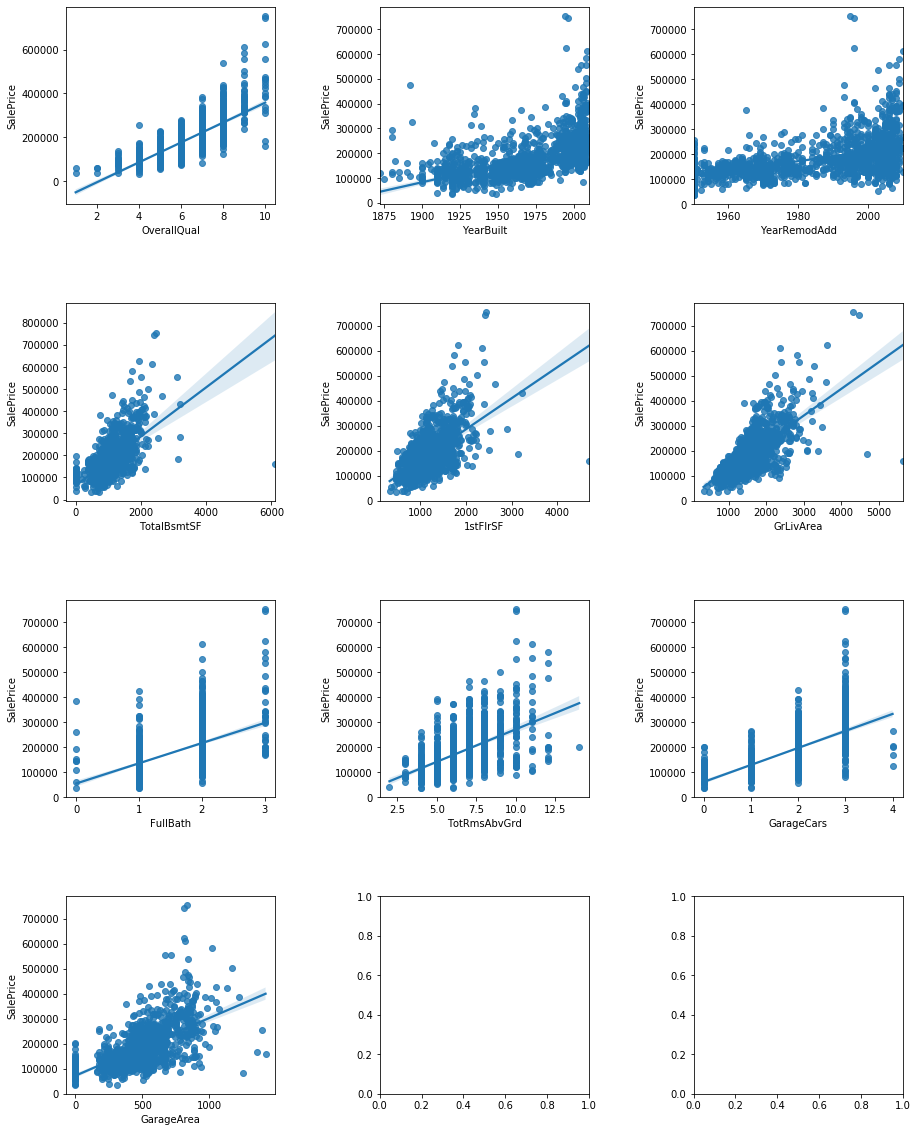

In [25]:
import math

nrows=math.ceil((comb_num.shape[1]/3))
fig, axs = plt.subplots(nrows=nrows,ncols=3,figsize=(15,20))
fig.subplots_adjust(hspace = .5, wspace=.5)
axs = axs.ravel()

c=0
for i in comb_num.columns[:-1] :
    sns.regplot(x=i, y="SalePrice", data=comb_num, ax=axs[c])
    c+=1

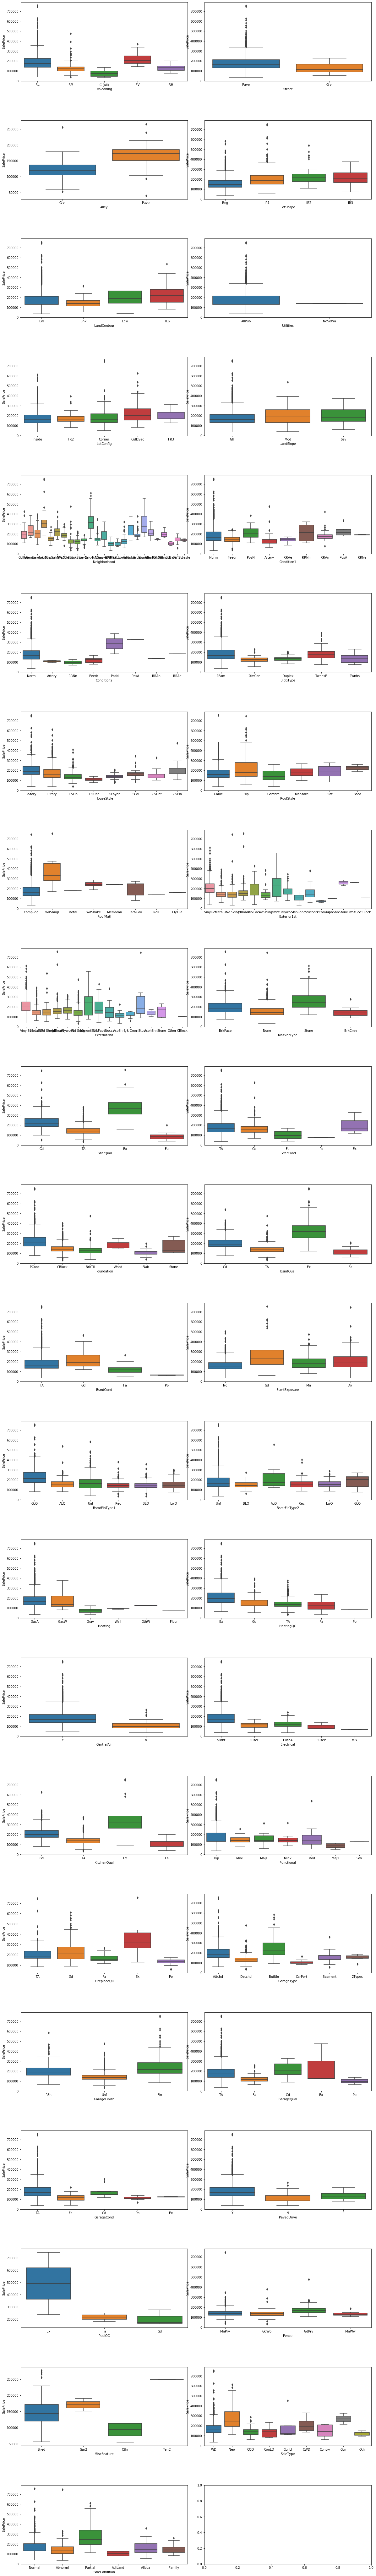

In [41]:
import math

nrows=math.ceil((comb_obj.shape[1]/2))
fig, axs = plt.subplots(nrows=nrows,ncols=2,figsize=(20,150))
fig.subplots_adjust(hspace = .5, wspace=.1)
axs = axs.ravel()

c=0
for i in comb_obj.columns[:-1] :
    sns.boxplot(x=i, y="SalePrice", data=comb_obj, ax=axs[c])
    c+=1

plt.show()

In [66]:
comb_obj=comb_obj[['MSZoning','Condition2','Neighborhood','ExterQual','PoolQC','RoofMatl','SalePrice']]

### Handeling missing data

Checking the missing data

In [10]:
for i in comb_num.columns[:-1]:
    print(comb_num[i].isnull().value_counts())

False    2919
Name: OverallQual, dtype: int64
False    2919
Name: YearBuilt, dtype: int64
False    2919
Name: YearRemodAdd, dtype: int64
False    2918
True        1
Name: TotalBsmtSF, dtype: int64
False    2919
Name: 1stFlrSF, dtype: int64
False    2919
Name: GrLivArea, dtype: int64
False    2919
Name: FullBath, dtype: int64
False    2919
Name: TotRmsAbvGrd, dtype: int64
False    2918
True        1
Name: GarageCars, dtype: int64
False    2918
True        1
Name: GarageArea, dtype: int64


In [11]:
comb_num[comb_num['TotalBsmtSF'].isnull()]

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice
Id,,,,,,,,,,,
2121,4,1946,1950,NaN,896,896,1,4,1.0,280.0,NaN


In [12]:
comb_num[comb_num['GarageCars'].isnull()]

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice
Id,,,,,,,,,,,
2577,5,1923,1999,859.0,942,1828,2,6,NaN,NaN,NaN


In [13]:
comb_num[comb_num['GarageArea'].isnull()]

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice
Id,,,,,,,,,,,
2577,5,1923,1999,859.0,942,1828,2,6,NaN,NaN,NaN


#### handling missing basment area 

In [14]:
comb_num[['GrLivArea','TotalBsmtSF']].corr()

,GrLivArea,TotalBsmtSF
GrLivArea,1.000000,0.445276
TotalBsmtSF,0.445276,1.000000


lets get the ratio of 

In [15]:
try_data=comb_num[['GrLivArea','TotalBsmtSF']]

In [16]:
try_data['Ratio']=(np.array(try_data['TotalBsmtSF'])/np.array(try_data['GrLivArea'])).round(1)

C:\Users\samla\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [85]:
try_data['Ratio'].value_counts()

1.0    1209
0.5     635
0.6     277
0.4     191
0.9     155
0.7     144
0.8     107
0.0      78
0.3      76
0.2      20
1.1      14
0.1       5
1.3       3
1.2       3
2.0       1
Name: Ratio, dtype: int64

In [18]:
comb_num.loc[2121,'TotalBsmtSF'] = comb_num.loc[2121,'GrLivArea']

C:\Users\samla\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [19]:
comb_num.loc[2121]['TotalBsmtSF']

896.0

#### Checking the garage missing data for house 2577

Lets check if House 2577 has a garage or not.

In [20]:
test.loc[2577,'GarageYrBlt']

nan

Therefore the house dosent have a garage, so lets put the data as 0

In [21]:
comb_num.loc[2577,'GarageCars'] = 0

In [22]:
comb_num.loc[2577,'GarageArea'] = 0

Missing Data for Object type

In [74]:
for i in comb_obj.columns[:-1]:
    print(comb_obj[i].isnull().value_counts())

False    2919
Name: MSZoning, dtype: int64
False    2919
Name: Condition2, dtype: int64
False    2919
Name: Neighborhood, dtype: int64
False    2919
Name: ExterQual, dtype: int64
False    2919
Name: PoolQC, dtype: int64
False    2919
Name: RoofMatl, dtype: int64


In [75]:
comb_obj.describe(include='object')

,MSZoning,Condition2,Neighborhood,ExterQual,PoolQC,RoofMatl
count,2919,2919,2919,2919,2919,2919
unique,5,8,25,4,5,8
top,RL,Norm,NAmes,TA,RL,CompShg
freq,2269,2889,443,1798,2269,2876


In [76]:
comb_obj['MSZoning']=comb_obj['MSZoning'].fillna('RL')
comb_obj['PoolQC']=comb_obj['MSZoning'].fillna('Ex')

### Checking Correlation

In [103]:
from scipy import stats

cor_data = comb_num[comb_num['SalePrice'].notnull()]

for i in cor_data.columns:
    p_coef,p_val = stats.pearsonr(cor_data[i],cor_data['SalePrice'])
    print("Data point: {} \t| Corr: {} \t| P-Val: {}".format(i,p_coef, p_val))  

Data point: OverallQual 	| Corr: 0.7909816005838048 	| P-Val: 2.185675268e-313
Data point: YearBuilt 	| Corr: 0.5228973328794968 	| P-Val: 2.9902290990158995e-103
Data point: YearRemodAdd 	| Corr: 0.5071009671113862 	| P-Val: 3.1649482419200737e-96
Data point: TotalBsmtSF 	| Corr: 0.6135805515591954 	| P-Val: 9.484229391507914e-152
Data point: 1stFlrSF 	| Corr: 0.6058521846919146 	| P-Val: 5.394710618971284e-147
Data point: GrLivArea 	| Corr: 0.708624477612652 	| P-Val: 4.518033646780971e-223
Data point: FullBath 	| Corr: 0.560663762748446 	| P-Val: 1.236470066760862e-121
Data point: TotRmsAbvGrd 	| Corr: 0.5337231555820282 	| P-Val: 2.772280932958747e-108
Data point: GarageCars 	| Corr: 0.6404091972583521 	| P-Val: 2.4986441671792262e-169
Data point: GarageArea 	| Corr: 0.6234314389183616 	| P-Val: 5.2650381679802e-158
Data point: SalePrice 	| Corr: 0.9999999999999999 	| P-Val: 0.0


In [104]:
comb_num

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice
Id,,,,,,,,,,,
1,7,2003,2003,856.0,856,1710,2,8,2.0,548.0,208500.0
2,6,1976,1976,1262.0,1262,1262,2,6,2.0,460.0,181500.0
3,7,2001,2002,920.0,920,1786,2,6,2.0,608.0,223500.0
4,7,1915,1970,756.0,961,1717,1,7,3.0,642.0,140000.0
5,8,2000,2000,1145.0,1145,2198,2,9,3.0,836.0,250000.0
...,...,...,...,...,...,...,...,...,...,...,...
2915,4,1970,1970,546.0,546,1092,1,5,0.0,0.0,NaN
2916,4,1970,1970,546.0,546,1092,1,6,1.0,286.0,NaN
2917,5,1960,1996,1224.0,1224,1224,1,7,2.0,576.0,NaN


In [121]:
comb_num_cat = comb_num[['OverallQual','FullBath','GarageCars','TotRmsAbvGrd']]
comb_num_cont = comb_num[['YearBuilt','YearRemodAdd','TotalBsmtSF','1stFlrSF','GrLivArea','GarageArea']]
comb_obj

,MSZoning,Condition2,Neighborhood,ExterQual,PoolQC,RoofMatl,SalePrice
Id,,,,,,,
1,RL,Norm,CollgCr,Gd,RL,CompShg,208500.0
2,RL,Norm,Veenker,TA,RL,CompShg,181500.0
3,RL,Norm,CollgCr,Gd,RL,CompShg,223500.0
4,RL,Norm,Crawfor,TA,RL,CompShg,140000.0
5,RL,Norm,NoRidge,Gd,RL,CompShg,250000.0
...,...,...,...,...,...,...,...
2915,RM,Norm,MeadowV,TA,RM,CompShg,NaN
2916,RM,Norm,MeadowV,TA,RM,CompShg,NaN
2917,RL,Norm,Mitchel,TA,RL,CompShg,NaN


In [123]:
df = pd.concat([comb_num_cont,comb_num_cat,comb_obj],axis=1)

In [124]:
train = df[df['SalePrice'].notnull()]
test = df[df['SalePrice'].isnull()]

In [125]:
train.to_csv("train_clean.csv")
test.to_csv("test_clean.csv")